# ベルヌーイ分布のパラメータ推定


## データ
- D : 1が出た回数
- N : データ数

## パラメータ
- mu : 1が出る確率

## モデル

$p(\mu) = beta(1,1)$

$p(y_{n}|p) = binomial(y_{n}|\mu)$

In [2]:
%matplotlib inline

In [3]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [4]:
stan_code = """
data{
    int D;
    int N;
}
parameters{
    real <lower=0,upper=1> mu;
}
model{
    mu ~ beta(1,1);
    D ~ binomial(N,mu);
    
}
"""

stan_dat = {'D': 10,
            'N': 100
              }

fit = pystan.stan(model_code=stan_code, data=stan_dat,iter=1000, chains=4)

print(fit)


Inference for Stan model: anon_model_594c0f3d496257b1fe9ee4aa481b8b02.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     0.11  7.7e-4   0.03   0.06   0.09    0.1   0.13   0.17   1594    1.0
lp__  -35.4    0.02   0.76 -37.62 -35.54 -35.11 -34.93 -34.88   1030    1.0

Samples were drawn using NUTS at Mon Nov  7 22:42:51 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


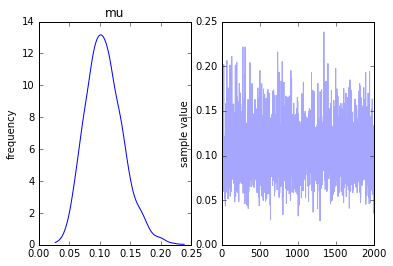

In [5]:
fit.plot()
plt.show()